# <center>MSIS 2802 - Data Science Analysis with Python</center>

## <center>Team - Omkar Gokhale & Mohit Kudalkar</center>

# About Data

The flight delays have been very common to us. We wanted to analyze patterns in the flight data set as we all could relate to it easily. The terms are easy to understand, and most important, we found authentic data for our analysis.
<br><br>
Our data about flighs is taken from US Department of Transportation's Bureau of Transportation Statistics website(https://www.bts.gov/). We have kept limited data for only 6 months. (Jan 2016 - June 2016 in US)
<br><br>
We explored the data set to know some commonly known patterns about flights and the delays. It's obvious that most of the delays in US are due to weather. So we got the data for daily weather at top 10/busiest airports in the US for 6 months. 
<br><br> AND we were lucky enough to find it. Weather Underground has all the historical weather related information about a particular airport location.(https://www.wunderground.com/) <br><br> We could join the flights data set with weather data on the basis of date and source and destination city. <br> There were some challenges with joining the data sets that we will uncover during the rest of the notebook!

<br>This was certainly an exciting experience working with large data sets and finding interesting patterns that we couldn't have derived by ourselves.<br> <h1><b>Let's Begin</b></h1>

<b>Flight-</b><br>
MONTH - Month of travel<br>
DAY_OF_MONTH - Day of the month (1-31) <br>
DAY_OF_WEEK - Day of the week (1-7)<br>
FL_DATE - Flight Date<br>
AIRLINE_ID - Airline identifier<br>
CARRIER - Carrier Name<br>
FL_NUM - Flight Number<br>
ORIGIN_AIRPORT_ID - Airport identifier<br>
ORIGIN - Source Airport Code
ORIGIN_CITY_NAME - Source Aiport City (City, StateCode)<br>
ORIGIN_STATE_ABR - Source Airport State Code<br>
ORIGIN_STATE_NM - Source Airport State Name<br>
DEST_AIRPORT_ID - Destination Airport identifier<br>
DEST - Destination Airport Code
DEST_CITY_NAME - Destination city name (City, Statecode)<br>
DEST_STATE_ABR - Destination state code<br>
DEST_STATE_NM - Destination state name<br>
DEP_TIME - Departure time <br>
DEP_DELAY - Departure delay (min)from source (contains negative delay for flights departing earlier than scheduled)<br>
DEP_DELAY_NEW - Departure delay from source with delay=0 for flights departing early<br>
ARR_TIME - Arrival time<br>
ARR_DELAY - Arrival delay (total) (contains negative delay for flights arriving earlier than scheduled)<br>
ARR_DELAY_NEW - Arrival delay (contains delay=0 for flights arriving earlier than scheduled)<br>
CANCELLED - Cancellation Flag (1 for cancelled, 0 for not cancelled)<br>
CANCELLATION_CODE - Cancellation code (contains values A,B,C,D which correspond to a different reason)<br>
DIVERTED - Diversion Flag (1 for diverted, 0 for not diverted)<br>
AIR_TIME - Total Air time for the flight(in min)<br>
DISTANCE - Distance - Source to Destination (in miles)<br>
CARRIER_DELAY- Delay due to carrier (in min)<br>
WEATHER_DELAY - Delay due to weather(in min)<br>
NAS_DELAY - Delay due to National Airspace System(NAS) (in min)<br>
SECURITY_DELAY - Delay due to security(in min)<br>
LATE_AIRCRAFT_DELAY - Delay due to late aircraft (in min)<br>

<b>Weather Data:</b><br>
CITY - City Name	<br>
STATE - State Code<br>
YEAR - Year<br>
MONTH - MonthName<br>
DAY_OF_MONTH - Day of the month (1-31)<br>
TempAvg	- Average temperature on that day at that location(F)<br>
DewAvg -  Average Dew point (F)<br>
HumAvg - Average Humidity Percentage (%)<br>
SeaLevelAvg - Average sea level pressure (inches)<br>
VisibilityAvg - Average Visibility (miles)<br>
WindAvg - Average Wind Speed (mph) <br>
Precip_Inches - Precipitation (inches)<br>



<b>Importing the Libraries</b>

In [1]:
#print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import pandas as pd
import numpy as np
import xlrd
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


## Input Files for 6 months and Weather Data

In [2]:
Jan  = pd.read_csv('January.csv')
Feb  = pd.read_csv('February.csv')
March  = pd.read_csv('March.csv')
April  = pd.read_csv('April.csv')
May  = pd.read_csv('May.csv')
June  = pd.read_csv('June.csv')
dfweather = pd.read_csv('weather.csv')
CancellationReason  = pd.read_csv('L_CANCELLATION.csv')

C:\Users\Omkar\AppData\Local\Enthought\Canopy\User\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Replace unidentifiable characters and Data Type change

In [3]:
dfweather.replace('-',0,inplace=True)

In [4]:
dfweather = dfweather.apply(pd.to_numeric,errors='ignore')

In [5]:
dfweather['TempAvg'] = pd.to_numeric(dfweather.TempAvg)

#### Merge Files to a combined dataframe for all 6 months

In [6]:
SixMonthsCombinedFlight =Jan.append(Feb).append(March).append(April).append(May).append(June)

In [7]:
SixMonthsCombinedFlight.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CANCELLATION_CODE,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 34
0,2016,1,1,5,2016-01-01,19790,DL,1248,11433,DTW,...,NaN,0.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,5,2016-01-01,19790,DL,1251,10397,ATL,...,NaN,0.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,5,2016-01-01,19790,DL,1254,12892,LAX,...,NaN,0.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,5,2016-01-01,19790,DL,1255,14869,SLC,...,NaN,0.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,5,2016-01-01,19790,DL,1256,10849,BZN,...,NaN,0.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,NaN


# Data Cleaning

#### Split the Origin and Destination City from (City, StateCode) format to two columns for City and State

In [8]:
SixMonthsCombinedFlight['ORIGIN_CITY_NAME']=SixMonthsCombinedFlight['ORIGIN_CITY_NAME'].str.split(',', expand=True)

In [9]:
SixMonthsCombinedFlight['DEST_CITY_NAME']=SixMonthsCombinedFlight['DEST_CITY_NAME'].str.split(',', expand=True)

#### We want only the top 10 Airport Cities; So, Let's filter out flight data for top 10 cities

In [10]:
df12=SixMonthsCombinedFlight[SixMonthsCombinedFlight.ORIGIN_CITY_NAME.isin(['Atlanta','Charlotte','Chicago','Dallas','Denver','Las Vegas','Los Angeles','New York','Phoenix','San Francisco'])]
df13=df12[df12.DEST_CITY_NAME.isin(['Atlanta','Charlotte','Chicago','Dallas','Denver','Las Vegas','Los Angeles','New York','Phoenix','San Francisco'])]

#### Transform Month in Weather dataframe

In [11]:
dfweather['MONTH'] =dfweather.MONTH.replace({'Jan' : 1, 'Feb' : 2,'Mar' : 3,'Apr' : 4,'May' : 5,'Jun' : 6})

#### We want to find out weather at both source and destination. So we will make a copy of weather data and join separately for Source city and Destination city

In [12]:
destinationtemp=dfweather.copy()

#### Let's consider Source weather first. <br> Drop the duplicate STATE column and rename weather data columns as ORIGIN_XXXXXX

In [13]:
dfweather=dfweather.drop('STATE',axis=1)
dfweather=dfweather.rename(columns = {'CITY':'ORIGIN_CITY_NAME','TempAvg':'ORIGIN_TempAvg','DewAvg':'ORIGIN_DewAvg','HumAvg':'ORIGIN_HumAvg','SeaLevelAvg':'ORIGIN_SeaLevelAvg','VisibilityAvg':'ORIGIN_VisibilityAvg','WindAvg':'ORIGIN_WindAvg','Precip_Inches':'ORIGIN_Precip_Inches','Events':'ORIGIN_Events'})
df14 = pd.merge(df13, dfweather, how='left', on=['YEAR','MONTH','DAY_OF_MONTH','ORIGIN_CITY_NAME'])

#### Let's consider Destination weather (Copy we made earlier)<br>Drop the duplicate STATE column and rename weather data columns to DEST_XXXXXX

In [14]:
destinationtemp=destinationtemp.drop('STATE',axis=1)
destinationtemp=destinationtemp.rename(columns = {'CITY':'DEST_CITY_NAME','TempAvg':'DEST_TempAvg','DewAvg':'DEST_DewAvg','HumAvg':'DEST_HumAvg','SeaLevelAvg':'DEST_SeaLevelAvg','VisibilityAvg':'DEST_VisibilityAvg','WindAvg':'DEST_WindAvg','Precip_Inches':'DEST_Precip_Inches','Events':'DEST_Events'})
df15 = pd.merge(df14, destinationtemp, how='left', on=['YEAR','MONTH','DAY_OF_MONTH','DEST_CITY_NAME'])

#### Merge the data with lookup table of cancellation code to get the text cancellation reason/description

In [15]:
MergedMasterData = pd.merge(df15, CancellationReason, how='left', on=['CANCELLATION_CODE'])

#### Drop un-necessary columns

In [16]:
MergedMasterData['CANCELLATION_DESCRIPTION']=MergedMasterData.DESCRIPTION
MergedMasterData=MergedMasterData.drop(['Unnamed: 0_x','Unnamed: 0_y','DESCRIPTION','Unnamed: 34'],axis=1)

# Final dataframe to work with

In [17]:
MergedMasterData.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'FL_DATE',
       u'AIRLINE_ID', u'CARRIER', u'FL_NUM', u'ORIGIN_AIRPORT_ID', u'ORIGIN',
       u'ORIGIN_CITY_NAME', u'ORIGIN_STATE_ABR', u'ORIGIN_STATE_NM',
       u'DEST_AIRPORT_ID', u'DEST', u'DEST_CITY_NAME', u'DEST_STATE_ABR',
       u'DEST_STATE_NM', u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW',
       u'ARR_TIME', u'ARR_DELAY', u'ARR_DELAY_NEW', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'AIR_TIME', u'DISTANCE',
       u'CARRIER_DELAY', u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'ORIGIN_TempAvg', u'ORIGIN_DewAvg',
       u'ORIGIN_HumAvg', u'ORIGIN_SeaLevelAvg', u'ORIGIN_VisibilityAvg',
       u'ORIGIN_WindAvg', u'ORIGIN_Precip_Inches', u'DEST_TempAvg',
       u'DEST_DewAvg', u'DEST_HumAvg', u'DEST_SeaLevelAvg',
       u'DEST_VisibilityAvg', u'DEST_WindAvg', u'DEST_Precip_Inches',
       u'CANCELLATION_DESCRIPTION'],
      dtype='object')

In [18]:
MergedMasterData.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,ORIGIN_WindAvg,ORIGIN_Precip_Inches,DEST_TempAvg,DEST_DewAvg,DEST_HumAvg,DEST_SeaLevelAvg,DEST_VisibilityAvg,DEST_WindAvg,DEST_Precip_Inches,CANCELLATION_DESCRIPTION
0,2016,1,1,5,2016-01-01,19790,DL,1254,12892,LAX,...,3.0,0,43.0,32.0,66.0,30.22,10.0,10.0,0,NaN
1,2016,1,1,5,2016-01-01,19790,DL,1262,12892,LAX,...,3.0,0,38.0,23.0,52.0,30.03,10.0,8.0,0,NaN
2,2016,1,1,5,2016-01-01,19790,DL,1279,11259,DAL,...,9.0,0,43.0,32.0,66.0,30.22,10.0,10.0,0,NaN
3,2016,1,1,5,2016-01-01,19790,DL,1286,10397,ATL,...,10.0,0,38.0,23.0,52.0,30.03,10.0,8.0,0,NaN
4,2016,1,1,5,2016-01-01,19790,DL,1292,12953,LGA,...,8.0,0,21.0,1.0,51.0,30.50,10.0,7.0,0,NaN


# Insight 1: Classification for cancelled flights

#### We know that a lot of flights get cancelled. Given the data set, we can see that a lot of flights have been cancelled. let's examine the behavioral patterns in the flight cancellations. 

### What are the circumstances when the flight is most likely to cancel? or in which circumstances, the flight are not canceled? Let's see..

#### Make dummy variables for Cancellation reason and Carriers to be used in Classification

In [19]:
Classification= pd.get_dummies(data=MergedMasterData, columns=['CANCELLATION_DESCRIPTION','CARRIER'])

In [20]:
Classification.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'FL_DATE',
       u'AIRLINE_ID', u'FL_NUM', u'ORIGIN_AIRPORT_ID', u'ORIGIN',
       u'ORIGIN_CITY_NAME', u'ORIGIN_STATE_ABR', u'ORIGIN_STATE_NM',
       u'DEST_AIRPORT_ID', u'DEST', u'DEST_CITY_NAME', u'DEST_STATE_ABR',
       u'DEST_STATE_NM', u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW',
       u'ARR_TIME', u'ARR_DELAY', u'ARR_DELAY_NEW', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'AIR_TIME', u'DISTANCE',
       u'CARRIER_DELAY', u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'ORIGIN_TempAvg', u'ORIGIN_DewAvg',
       u'ORIGIN_HumAvg', u'ORIGIN_SeaLevelAvg', u'ORIGIN_VisibilityAvg',
       u'ORIGIN_WindAvg', u'ORIGIN_Precip_Inches', u'DEST_TempAvg',
       u'DEST_DewAvg', u'DEST_HumAvg', u'DEST_SeaLevelAvg',
       u'DEST_VisibilityAvg', u'DEST_WindAvg', u'DEST_Precip_Inches',
       u'CANCELLATION_DESCRIPTION_Carrier',
       u'CANCELLATION_DESCRIPTION_National Air System',
 

In [21]:
#Check if any columns have nulls
Classification.isnull().any()

YEAR                                            False
MONTH                                           False
DAY_OF_MONTH                                    False
DAY_OF_WEEK                                     False
FL_DATE                                         False
AIRLINE_ID                                      False
FL_NUM                                          False
ORIGIN_AIRPORT_ID                               False
ORIGIN                                          False
ORIGIN_CITY_NAME                                False
ORIGIN_STATE_ABR                                False
ORIGIN_STATE_NM                                 False
DEST_AIRPORT_ID                                 False
DEST                                            False
DEST_CITY_NAME                                  False
DEST_STATE_ABR                                  False
DEST_STATE_NM                                   False
DEP_TIME                                         True
DEP_DELAY                   

In [22]:
dfClass = Classification[['AIR_TIME','DISTANCE','ORIGIN_TempAvg','ORIGIN_DewAvg','ORIGIN_HumAvg','ORIGIN_SeaLevelAvg','ORIGIN_VisibilityAvg','ORIGIN_WindAvg','DEST_TempAvg','DEST_DewAvg','DEST_HumAvg','DEST_SeaLevelAvg','DEST_VisibilityAvg','DEST_WindAvg','CARRIER_AA', 'CARRIER_B6','CARRIER_DL', 'CARRIER_EV', 'CARRIER_F9', 'CARRIER_NK','CARRIER_OO', 'CARRIER_UA', 'CARRIER_VX', 'CARRIER_WN','CANCELLED']]

In [23]:
dfClass = dfClass.apply(lambda x: x.fillna(x.median()),axis=0)

#### Let's make X and Y to pass on to the model

In [24]:
X = dfClass[['AIR_TIME','DISTANCE','ORIGIN_TempAvg','ORIGIN_DewAvg','ORIGIN_HumAvg','ORIGIN_SeaLevelAvg','ORIGIN_VisibilityAvg','ORIGIN_WindAvg','DEST_TempAvg','DEST_DewAvg','DEST_HumAvg','DEST_SeaLevelAvg','DEST_VisibilityAvg','DEST_WindAvg','CARRIER_AA', 'CARRIER_B6','CARRIER_DL', 'CARRIER_EV', 'CARRIER_F9', 'CARRIER_NK','CARRIER_OO', 'CARRIER_UA', 'CARRIER_VX', 'CARRIER_WN']]

In [25]:
Y = dfClass.CANCELLED

#### Let's run the decision tree classifier model

In [26]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [27]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

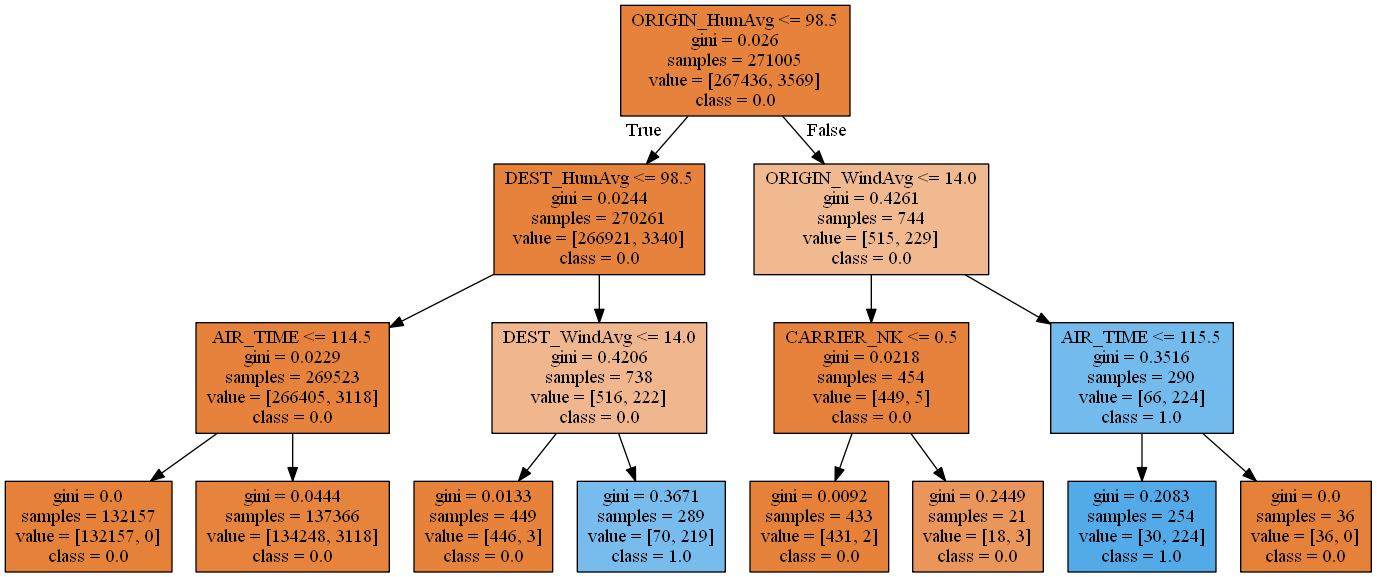

In [28]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# Findings From Classification - 

###  If humidity at source city is less than 98.5 AND humidity at Destination city is more than 98.5 AND wind speed at destination is more than 14, the flight is most likely to be cancelled. <br><br>  If humidity at source city is more than 98.5 AND wind speed at source city is more than 14 AND air time is less than 115.5, then the flight tends to be cancelled. BUT if the airtime is more than 115.5, then the flight almost always is not cancelled.

In [29]:
dfClass['ORIGIN_WindBin'] = pd.cut(dfClass['ORIGIN_WindAvg'],bins=[0,14,50])
dfClass['ORIGIN_HumBin'] = pd.cut(dfClass['ORIGIN_HumAvg'],bins=[0,98.5,500])

#### As the tree has depth of 3, validation of the finding is done using two graphs. 

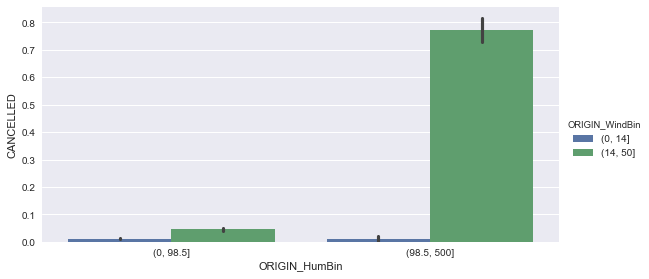

In [30]:
sns.factorplot(x='ORIGIN_HumBin',y='CANCELLED', hue='ORIGIN_WindBin',data=dfClass, aspect=2, kind='bar')

In [31]:
dfairtime= dfClass[dfClass.ORIGIN_HumAvg >98.5]
dfairtime['airtimebin'] = pd.cut(dfairtime['AIR_TIME'], bins=[0,115.5,50000]) 

C:\Users\Omkar\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


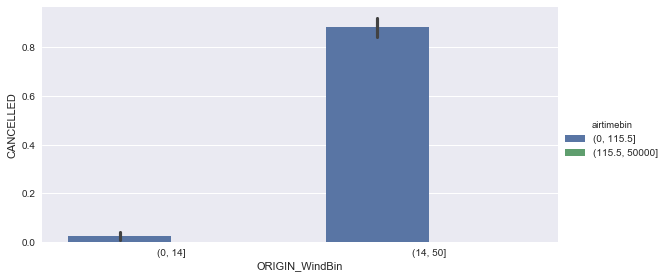

In [32]:
sns.factorplot(x='ORIGIN_WindBin', y='CANCELLED', hue='airtimebin',data=dfairtime, aspect=2, kind='bar')

# Insight 2: Clustering 

### How are the flights grouped? What are the most important parameters while grouping flights? Is there anything we can find through the clustering results? <br><br> Clustering gives us the grouping of the data set and we can determine the primary parameter(s) on which the cluster is formed. 

In [33]:
dfClustering = Classification[['ARR_DELAY','AIR_TIME','DISTANCE','CANCELLED','ORIGIN_TempAvg','ORIGIN_DewAvg','ORIGIN_HumAvg','ORIGIN_SeaLevelAvg','ORIGIN_VisibilityAvg','ORIGIN_WindAvg','DEST_TempAvg','DEST_DewAvg','DEST_HumAvg','DEST_SeaLevelAvg','DEST_VisibilityAvg','DEST_WindAvg','CARRIER_AA', 'CARRIER_B6','CARRIER_DL', 'CARRIER_EV', 'CARRIER_F9', 'CARRIER_NK','CARRIER_OO', 'CARRIER_UA', 'CARRIER_VX', 'CARRIER_WN']]

#### Filling up nulls

In [34]:
dfClustering['ARR_DELAY'] = dfClustering.ARR_DELAY.fillna(0)

C:\Users\Omkar\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
dfClustering = dfClustering.apply(lambda x: x.fillna(x.median()),axis=0)

#### We are using K-Means Clustering model

In [36]:
from sklearn.cluster import KMeans

In [37]:
clu = KMeans(n_clusters=2,random_state=2)
clu.fit(dfClustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [38]:
dfcluster = dfClustering.copy()

In [39]:
dfcluster['cluster'] = clu.labels_

## Here are our two clusters:-

In [40]:
dfcluster.groupby('cluster').mean()

,ARR_DELAY,AIR_TIME,DISTANCE,CANCELLED,ORIGIN_TempAvg,ORIGIN_DewAvg,ORIGIN_HumAvg,ORIGIN_SeaLevelAvg,ORIGIN_VisibilityAvg,ORIGIN_WindAvg,...,CARRIER_AA,CARRIER_B6,CARRIER_DL,CARRIER_EV,CARRIER_F9,CARRIER_NK,CARRIER_OO,CARRIER_UA,CARRIER_VX,CARRIER_WN
cluster,,,,,,,,,,,,,,,,,,,,,
0,5.740774,88.572191,608.349939,0.015442,59.928737,39.371660,55.529804,29.950734,9.554216,6.263855,...,0.185511,0.015407,0.167302,0.004658,0.037314,0.027765,0.043657,0.162398,0.058461,0.297529
1,0.793874,240.232758,1912.269899,0.009290,60.601744,40.001838,55.655209,29.911674,9.496983,5.754166,...,0.310717,0.070597,0.205936,0.000000,0.024884,0.025474,0.004795,0.142881,0.077330,0.137387


## Finding from Clustering

### The short distance/duration flights have highest delays. Long distance/duration has less delays.

#### Validation:-

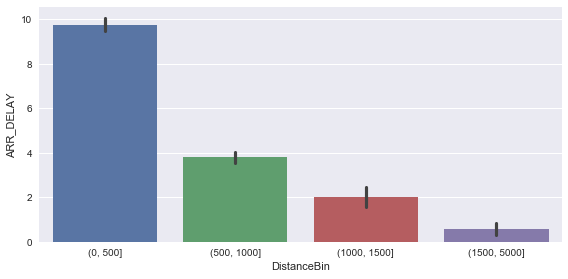

In [41]:
dfcluster['DistanceBin'] = pd.cut(dfcluster['DISTANCE'],bins=[0,500,1000,1500,5000])
sns.factorplot(x = 'DistanceBin', y='ARR_DELAY', data=dfcluster, kind='bar', aspect=2)

# Insight 3: Regression for Calculating Delay

## We saw that flights are cancelled or delayed... <br><br> How much delay? Let's figure out..!! <br><br> We are using decision tree regressor to find what situations contribute to what amount of delay.

#### We removed the DEP_DELAY column as it is very obvious that if a flight departs early, it is most likely to arrive early. <br> 
For Example, if a flight departs 20 min late, and if it arrives 23 min late, it is not interesting; it is obvious! So we removed the departure delay column from regression model. We wanted to examine the impact of each weather data column on the delay. So, we passed all weather columns to the model.

In [42]:
DecisionTreeReg =MergedMasterData[['ARR_DELAY','ORIGIN_TempAvg','ORIGIN_DewAvg','ORIGIN_HumAvg','ORIGIN_SeaLevelAvg','ORIGIN_VisibilityAvg','ORIGIN_WindAvg','DEST_TempAvg','DEST_DewAvg','DEST_HumAvg','DEST_SeaLevelAvg','DEST_VisibilityAvg','DEST_WindAvg']]
DecisionTreeReg=DecisionTreeReg.apply(lambda x: x.fillna(x.median()),axis=0)
A = DecisionTreeReg.drop('ARR_DELAY',axis=1)
B = DecisionTreeReg.ARR_DELAY

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

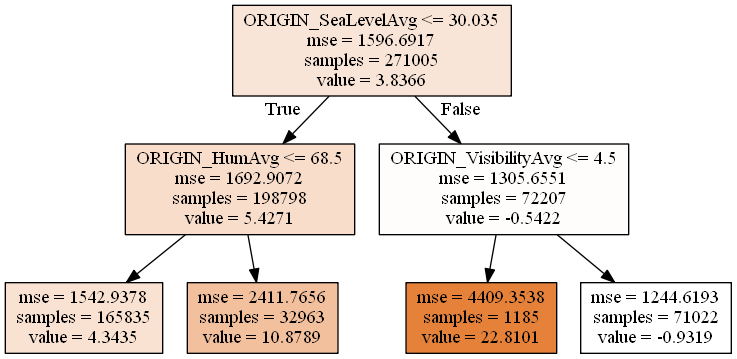

In [43]:
import sklearn.tree
dt = sklearn.tree.DecisionTreeRegressor(max_depth=2)
dt.fit(A,B)
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

dt_feature_names = list(A.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## Finding from Regression

### If SeaLevel Pressure at Source Airport City is more than 30.035, and If Visibility is less than or equal to 4.5 miles, the delay is high (22.8 min). <br><br>Whereas if Sea Level Pressure at Source Airpport City is more than 30.035, and visibility at Source Airport is more than 4.5, then the delay is negative. (Flight actually arrives early!!)

#### Validity of the finding: Observe green line

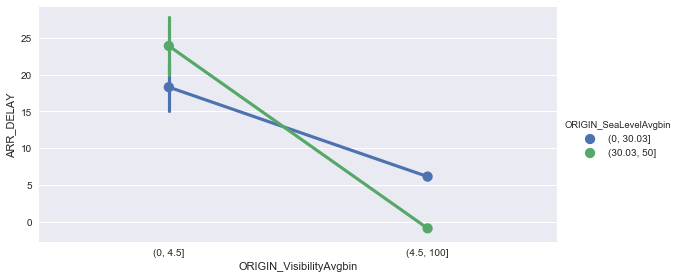

In [44]:
Insight3 =MergedMasterData.copy()
Insight3['ORIGIN_SeaLevelAvgbin'] = pd.cut(Insight3['ORIGIN_SeaLevelAvg'],bins=[0,30.03,50])
Insight3['ORIGIN_VisibilityAvgbin'] = pd.cut(Insight3['ORIGIN_VisibilityAvg'],bins=[0,4.5,100])
sns.factorplot(x='ORIGIN_VisibilityAvgbin', y='ARR_DELAY',hue='ORIGIN_SeaLevelAvgbin',data=Insight3, aspect = 2)

# <center>Thank you!</center>